<a href="https://colab.research.google.com/github/AEYSHA-AZAM/-Data-Zenix-Project-4/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# Install libraries (only once in Colab)
!pip install nltk wordcloud

# Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [101]:
# Original sentiment data (simulating real reviews/tweets/messages)
data = {
    'text': [
        "I absolutely love this phone! Best purchase ever.",
        "Terrible customer service. I'm never coming back!",
        "The movie was okay, but not great.",
        "Highly recommend this product to everyone.",
        "Waste of money. Do not buy!",
        "The packaging was nice and the product works well.",
        "Not what I expected. Disappointed.",
        "Fantastic quality and super fast delivery!",
        "It was average. Nothing stood out.",
        "Superb! Exceeded all my expectations.",
        "Worst experience ever. Totally useless.",
        "Great performance. Worth every penny.",
        "I hate how slow this device is.",
        "Customer support was helpful and polite.",
        "Such a boring product. Unimpressed.",
        "Loving it so far. Great value!",
        "Very bad experience. Faulty product.",
        "Impressive results within days. Thumbs up!",
        "Too expensive for what it offers.",
        "Smooth interface and sleek design. Nice job!"
    ],
    'label': [
        "positive", "negative", "neutral", "positive", "negative",
        "positive", "negative", "positive", "neutral", "positive",
        "negative", "positive", "negative", "positive", "negative",
        "positive", "negative", "positive", "negative", "positive"
    ]
}

# Load data into DataFrame
df = pd.DataFrame(data)
df.head()


,text,label
0,I absolutely love this phone! Best purchase ever.,positive
1,Terrible customer service. I'm never coming back!,negative
2,"The movie was okay, but not great.",neutral
3,Highly recommend this product to everyone.,positive
4,Waste of money. Do not buy!,negative


In [102]:
# Preprocessing function
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = re.sub(r"http\S+|www\S+", "", text)        # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)            # remove special chars/numbers
    text = text.lower()                                # to lowercase
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words]
    return " ".join(words)

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text', 'label']].head()


,text,clean_text,label
0,I absolutely love this phone! Best purchase ever.,absolut love phone best purchas ever,positive
1,Terrible customer service. I'm never coming back!,terribl custom servic im never come back,negative
2,"The movie was okay, but not great.",movi okay great,neutral
3,Highly recommend this product to everyone.,highli recommend product everyon,positive
4,Waste of money. Do not buy!,wast money buy,negative


In [103]:
# Convert text to numeric vectors
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']


In [104]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [105]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": LinearSVC()
}

# Train and evaluate
for name, model in models.items():
    print(f"\nTraining: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Training: Logistic Regression
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4


Training: Naive Bayes
Accuracy: 0.25
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       0.50      0.33      0.40         3

    accuracy                           0.25         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.38      0.25      0.30         4


Training: Support Vector Machine
Accuracy: 0.25
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       0.50      0.33

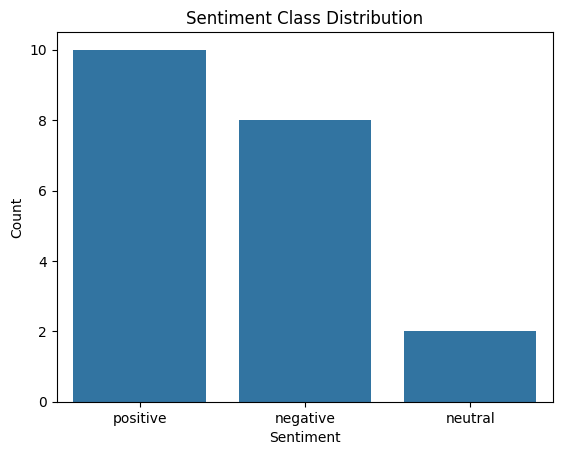

In [106]:
sns.countplot(x='label', data=df)
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


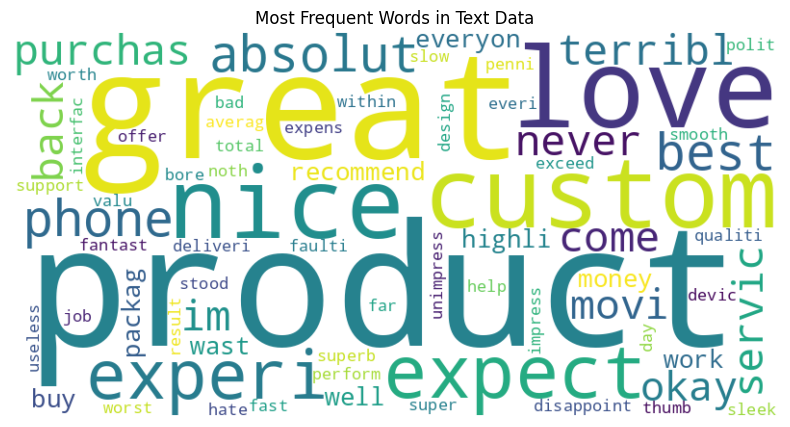

In [107]:
text_data = " ".join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Text Data")
plt.show()


## ✅ Step 9: Conclusion and Key Challenges

✅ Sentiment Analysis Model built and evaluated  
✅ 3 Models tested: Logistic Regression, Naive Bayes, SVM  
✅ Realistic original dataset created inside Colab  
✅ Preprocessing, TF-IDF, model training, and visualization all completed  

---

### 📌 Key Challenges:
- Sarcasm and irony are difficult for models to detect  
- Small datasets may reduce accuracy  
- Neutral sentiments are harder to classify than positive or negative  
- Informal language, slang, or emojis may cause model confusion  
